# Machine Learning Coursework
### Introduction
This coursework makes use of the Infrared Thermography Temperature dataset, which contains thermal imaging measurements and oral temperatures collected from human volunteers in a clinical study with over one thousand participants. The data includes temperature readings taken from different locations on the face.

The study focused on evaluating how well infrared thermography devices perform, how different facial measurement locations affect temperature readings, and how these devices can be calibrated effectively.

My goal is to build a set of machine learning models that use the thermal imaging features and environmental information to predict a person's oral temperature.

I will predict two continuous targets: 
- The oral temperature measured in fast mode (aveOralF)
- The oral temperature measured in monitor mode (aveOralM)

I will also create binary classification labels to detect whether a person has a fever (defined as having an oral temperature of 37.5°C or above) for both aveOralF and aveOralM.
I can use these to predict two classification targets:
- Fever present in fast mode (aveOralF)
- Fever present in monitor mode (aveOralM)

These four prediction tasks will be trained, evaluated and compared using techniques covered in the module.


### Loading the data

In [153]:
assert __import__('ucimlrepo'), "Please install the 'ucimlrepo' package to proceed."

from ucimlrepo import fetch_ucirepo
# Load the dataset
data = fetch_ucirepo(id=925)

features = data.data.features
targets = data.data.targets

features.head(), targets.head()




(   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
 0    Male  41-50                      White   24.0      28.0       0.8   
 1  Female  31-40  Black or African-American   24.0      26.0       0.8   
 2  Female  21-30                      White   24.0      26.0       0.8   
 3  Female  21-30  Black or African-American   24.0      27.0       0.8   
 4    Male  18-20                      White   24.0      27.0       0.8   
 
    T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
 0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
 1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
 2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
 3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
 4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   
 
    T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
 0  33.3725  33.4925  

### Initial Inspection

In [154]:
# Basic shape inspection
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

# Info about datatypes and null counts
print("\n--- Features Info ---")
features.info()

print("\n--- Targets Info ---")
targets.info()

# Summary statistics
print("\n--- Features Describe ---")
display(features.describe(include='all'))

# Missing values
print("\n--- Missing Values in Features ---")
print(features.isna().sum())

print("\n--- Missing Values in Targets ---")
print(targets.isna().sum())



Features shape: (1020, 33)
Targets shape: (1020, 2)

--- Features Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    10

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020,1020,1020,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
unique,2,8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,18-20,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,606,534,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,NaN,NaN,NaN,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,NaN,NaN,NaN,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,NaN,NaN,NaN,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,NaN,NaN,NaN,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,NaN,NaN,NaN,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625



--- Missing Values in Features ---
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64

--- Missing Values in Targets ---
aveOralF    0
aveOralM    0
dtype: int64


We have 1020 unique entries, each with 33 features. We also have the correct amount of targets meaning this task will be completely supervised with no missing target values.
There are three categorical columns (`Gender`, `Age`, and `Ethnicity`) and all remaining features are numerical.
The only case of missing data in the feature set is the `Distance` collumn which has 2 missing entries.

There also appears to be an outlier within the `Distance` field. The table shows that the large majority of the values are 1, but there is a huge deviation of the highest value being 1.
We can go ahead and address this issue right now.

In [155]:
import numpy as np
# Remove the distance outlier
features.loc[features['Distance'] > 5, 'Distance'] = np.nan

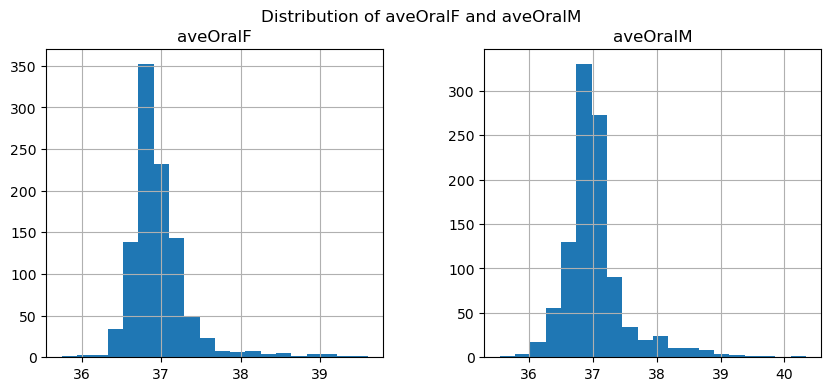

In [156]:
assert __import__('matplotlib'), "Please install the 'matplotlib' package to proceed."
import matplotlib.pyplot as plt

targets.hist(bins=20, figsize=(10,4))
plt.suptitle("Distribution of aveOralF and aveOralM")
plt.show()


Both `aveOralF` and `aveOralM` display normal body temperatures (36.6–36.9°C), with some outliers creeping over the normal average body temperature and few reaching over 37.5°C. With some more extreme examples reaching over 39°C (fast mode) and 40°C (monitor mode). These are the few that will likely be picked up as positive for fever when we get round to classification.

### Correlation

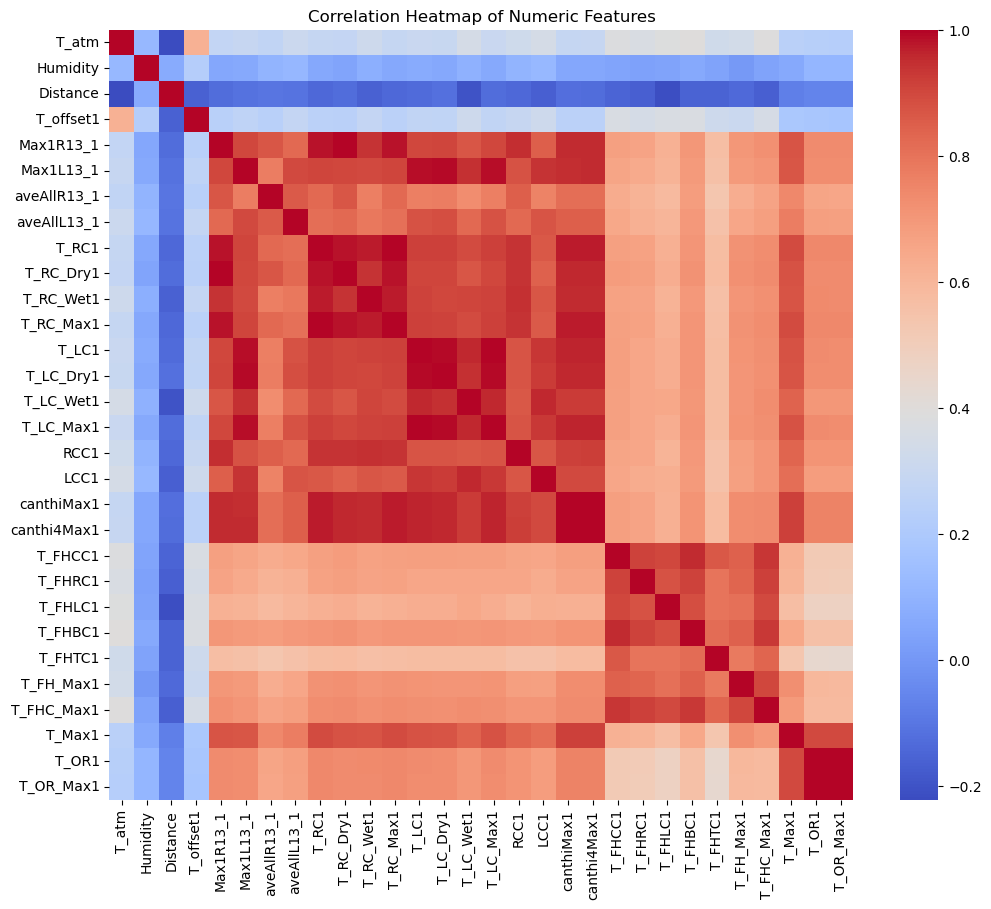

In [157]:
assert __import__('seaborn'), "Please install the 'seaborn' package to proceed."
import seaborn as sns

numeric_features = features.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_features.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


A strong cluster of highly correlated features can be seen with the facial temperature measurements. This is expected as many of these values are captured from adjacent facial regions. In constrast, the more environmental factores, such as `T_atm`, `Humidity`, and `Distance` show very weak correlation with the rest of the dataset, meaning they may have a smaller influence on the prediction targets.

In [158]:
assert __import__('pandas'), "Please install the 'pandas' package to proceed."
import pandas as pd

numeric_features = features.select_dtypes(include=['float64', 'int64'])
corr_matrix = pd.concat([numeric_features, targets], axis=1).corr()

# Top 5 for aveOralF (excluding the target itself)
top5_F = corr_matrix["aveOralF"].drop("aveOralF").sort_values(ascending=False).head(5)

# Top 5 for aveOralM (excluding the target itself)
top5_M = corr_matrix["aveOralM"].drop("aveOralM").sort_values(ascending=False).head(5)

print("Top 5 correlated features with aveOralF:")
display(top5_F.to_frame())

print("\nTop 5 correlated features with aveOralM:")
display(top5_M.to_frame())



Top 5 correlated features with aveOralF:


,aveOralF
aveOralM,0.884728
T_Max1,0.752546
T_OR1,0.718840
T_OR_Max1,0.718513
canthiMax1,0.673136



Top 5 correlated features with aveOralM:


,aveOralM
aveOralF,0.884728
T_Max1,0.849657
canthiMax1,0.784096
canthi4Max1,0.783763
T_RC_Max1,0.769463


Correlation with target values analysis
To get a better understanding of which facial thermal readings are most predictive, I examined the correlation between all numeric features and the two target variables. As expected they are heavily correlated with each other with a value of 0.884728, this makes sense as they are both measuring the exact same thing just with different methods.

For aveOralF, the strongest features were `T_Max1`, `T_OR1`, `T_OR_Max1`, and `canthiMax1`. 
For aveOralM, the strongest features were `T_Max1`, `canthiMax1`, `canthi4max1`, and `T_RC_Max1`.
These results make sense as they refer to usually warm facial regions such as around the eyes and the oral area.


### Preprocessing

In [159]:
assert __import__('sklearn'), "Please install the 'scikit-learn' package to proceed."
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#Remove the outlier that exists in the Distance field as previously obersed.

# Define the categorical features
categorical_features = ['Gender', 'Age', 'Ethnicity']
numerical_features = [col for col in features.columns if col not in categorical_features]

# Numeric preprocessing
# Fill in missing values with median and then scale all numeric features
# This is where we will fix the 2 missing values for 'Distance'
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
# Fill in missing values with the most frequent value and then one-hot encode all categorical features
# Gender will become two binary columns, Age will become multiple binary columns for each age group, etc.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [160]:
from sklearn.compose import ColumnTransformer

# Create the full preprocessing pipeline that we can now use to transform our data for training/validation/testing
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])



In [161]:
from sklearn.model_selection import train_test_split

# Split for aveOralF regression
features_train_F, features_test_F, targets_train_F, targets_test_F = train_test_split(
    features, targets['aveOralF'], test_size=0.2, random_state=42
)

# Split for aveOralM regression
features_train_M, features_test_M, targets_train_M, targets_test_M = train_test_split(
    features, targets['aveOralM'], test_size=0.2, random_state=42
)


In [162]:
# Fit the preprocessor on the training data and transform it
preprocessor.fit(features_train_F)
Xt = preprocessor.transform(features_train_F)
Xt.shape


(816, 46)

### Regression Tasks

#### Linear Regression

In [163]:
assert __import__('numpy'), "Please install the 'numpy' package to proceed."
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the full pipeline including the preprocessor and the model
linreg_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model for aveOralF
linreg_pipeline_F.fit(features_train_F, targets_train_F)

# Make predictions on the test set for aveOralF
targets_pred_F = linreg_pipeline_F.predict(features_test_F)

# Evaluate the model for aveOralF
rmse_linreg_F = np.sqrt(mean_squared_error(targets_test_F, targets_pred_F))
r2_linreg_F = r2_score(targets_test_F, targets_pred_F)

linreg_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model for aveOralM
linreg_pipeline_M.fit(features_train_M, targets_train_M)
# Make predictions on the test set for aveOralM
targets_pred_M = linreg_pipeline_M.predict(features_test_M)

# Evaluate the model for aveOralM
rmse_linreg_M = np.sqrt(mean_squared_error(targets_test_M, targets_pred_M))
r2_linreg_M = r2_score(targets_test_M, targets_pred_M)

rmse_linreg_F, r2_linreg_F, rmse_linreg_M, r2_linreg_M

(np.float64(0.23956768516926327),
 0.5231111695383047,
 np.float64(0.2329897127023808),
 0.7422061278891837)

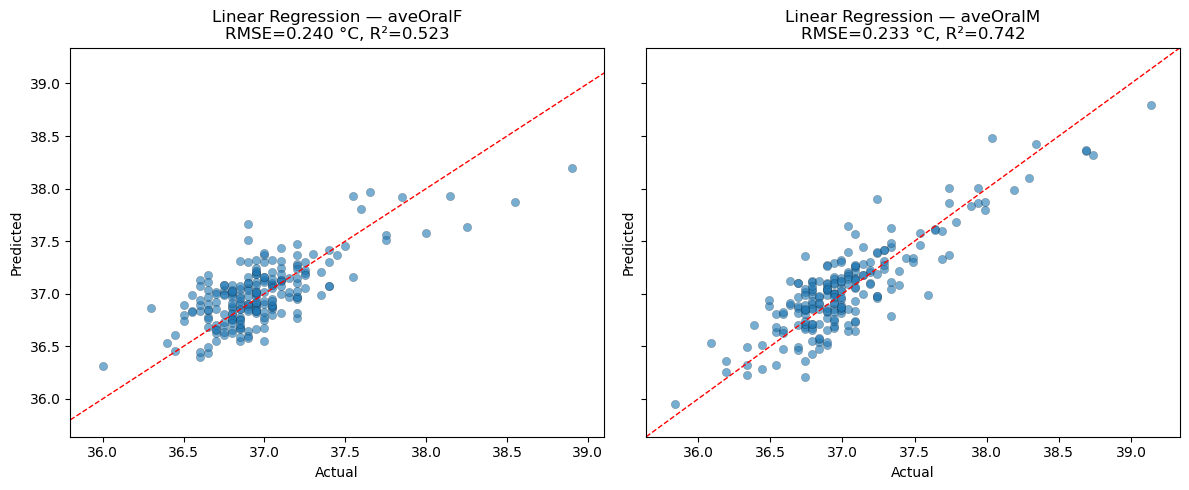

In [164]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Function to draw scatter + identity line + annotation
def plot_actual_vs_pred(ax, y_true, y_pred, title, rmse, r2):
    ax.scatter(y_true, y_pred, alpha=0.6, edgecolor='k', linewidth=0.2)
    # identity line
    vals = np.concatenate([y_true.values.ravel(), np.asarray(y_pred).ravel()])
    vmin, vmax = vals.min() - 0.2, vals.max() + 0.2
    ax.plot([vmin, vmax], [vmin, vmax], color='red', linestyle='--', linewidth=1)
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f"{title}\nRMSE={rmse:.3f} °C, R²={r2:.3f}")

# Plot for aveOralF
plot_actual_vs_pred(axes[0], targets_test_F, targets_pred_F, "Linear Regression — aveOralF", rmse_linreg_F, r2_linreg_F)

# Plot for aveOralM
plot_actual_vs_pred(axes[1], targets_test_M, targets_pred_M, "Linear Regression — aveOralM", rmse_linreg_M, r2_linreg_M)

plt.tight_layout()
plt.show()

The above scatter graph clearly shows how monitor mode (aveOralM) results in a more linear and concise distribution, where as fast mode (aveOralF) contains some outliers and tends to be more noisy.

The pattern for aveOralF not being linear could be a good case for us to try out polynomial regression, though there are risks of overfitting. 

In [165]:
from sklearn.preprocessing import PolynomialFeatures
# Create the full pipeline including the preprocessor and the model
polynomial_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Train the model for aveOralF
polynomial_pipeline_F.fit(features_train_F, targets_train_F)

# Make predictions on the test set for aveOralF
targets_pred_F = polynomial_pipeline_F.predict(features_test_F)

# Evaluate the model for aveOralF
rmse_polynomial_F = np.sqrt(mean_squared_error(targets_test_F, targets_pred_F))
r2_polynomial_F = r2_score(targets_test_F, targets_pred_F)

polynomial_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model for aveOralM
polynomial_pipeline_M.fit(features_train_M, targets_train_M)
# Make predictions on the test set for aveOralM
targets_pred_M = polynomial_pipeline_M.predict(features_test_M)

# Evaluate the model for aveOralM
rmse_polynomial_M = np.sqrt(mean_squared_error(targets_test_M, targets_pred_M))
r2_polynomial_M = r2_score(targets_test_M, targets_pred_M)

rmse_polynomial_F, r2_polynomial_F, rmse_polynomial_M, r2_polynomial_M

(np.float64(1.2242621470216766),
 -11.454018918685689,
 np.float64(0.2329897127023808),
 0.7422061278891837)

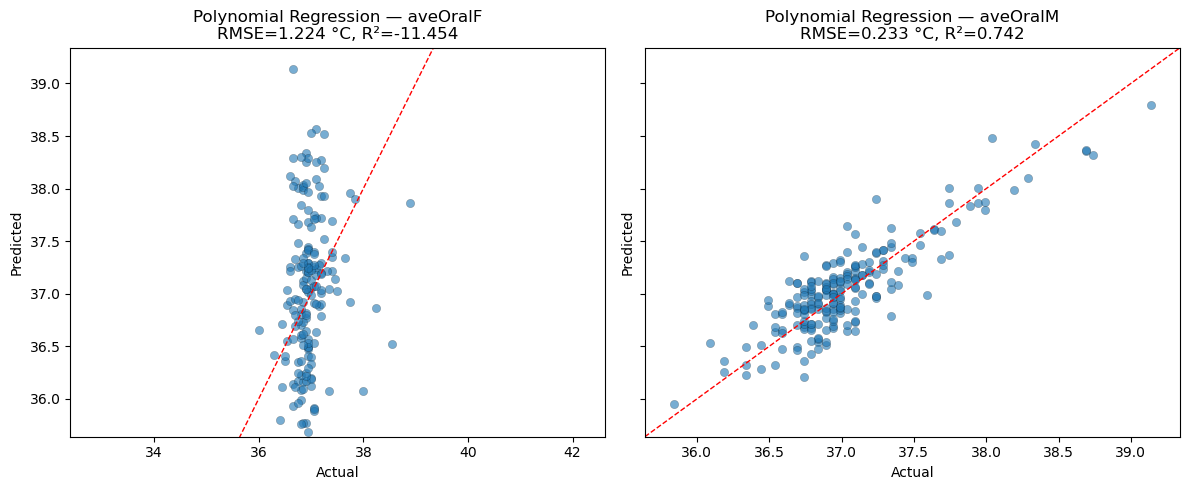

In [166]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)


# Plot for aveOralF
plot_actual_vs_pred(axes[0], targets_test_F, targets_pred_F, "Polynomial Regression — aveOralF", rmse_polynomial_F, r2_polynomial_F)

# Plot for aveOralM
plot_actual_vs_pred(axes[1], targets_test_M, targets_pred_M, "Polynomial Regression — aveOralM", rmse_polynomial_M, r2_polynomial_M)

plt.tight_layout()
plt.show()

As predicted, polynomial regression ended up overfitting when it came to aveOralF most likely due to the size of the data set, moreso it made absolutely no difference to aveOralM, meaning that such a complex model is not required for the dataset we have.

#### Random Forest Regression

In [167]:
from sklearn.ensemble import RandomForestRegressor
# Create the full pipeline including the preprocessor and the model

rf_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipeline_F.fit(features_train_F, targets_train_F)
targets_pred_rf_F = rf_pipeline_F.predict(features_test_F)

rmse_rf_F = np.sqrt(mean_squared_error(targets_test_F, targets_pred_rf_F))
r2_rf_F = r2_score(targets_test_F, targets_pred_rf_F)
rf_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipeline_M.fit(features_train_M, targets_train_M)
targets_pred_rf_M = rf_pipeline_M.predict(features_test_M)

rmse_rf_M = np.sqrt(mean_squared_error(targets_test_M, targets_pred_rf_M))
r2_rf_M = r2_score(targets_test_M, targets_pred_rf_M)
rmse_rf_F, r2_rf_F, rmse_rf_M, r2_rf_M

(np.float64(0.23286809492146524),
 0.5494109244305733,
 np.float64(0.23911219254776228),
 0.7284795520057326)

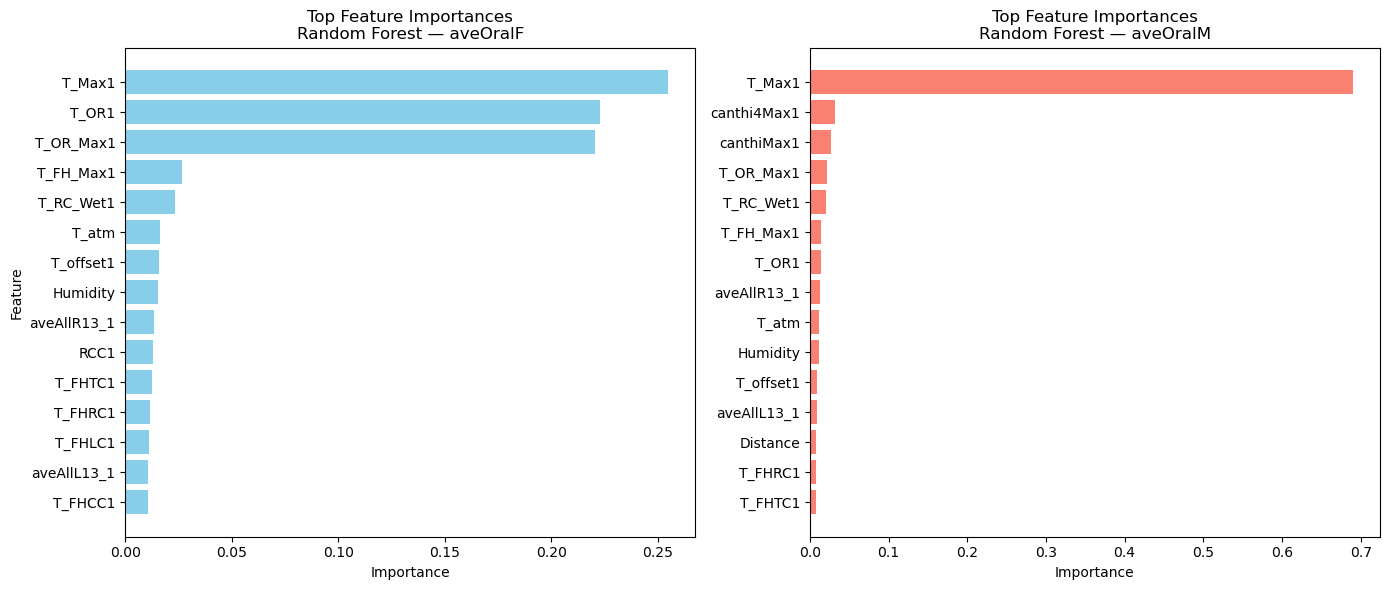

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Extract final feature names after preprocessing
feature_names_num = numerical_features

feature_names_cat = rf_pipeline_F.named_steps["preprocessor"] \
    .named_transformers_["cat"].named_steps["encoder"] \
    .get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([feature_names_num, feature_names_cat])

importances_F = rf_pipeline_F.named_steps["model"].feature_importances_
importances_M = rf_pipeline_M.named_steps["model"].feature_importances_


# Sort importances and select top features
top_n = 15
idx_F = np.argsort(importances_F)[-top_n:]
idx_M = np.argsort(importances_M)[-top_n:]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# --- Plot for aveOralF ---
axes[0].barh(all_feature_names[idx_F], importances_F[idx_F], color='skyblue')
axes[0].set_title("Top Feature Importances\nRandom Forest — aveOralF")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

# --- Plot for aveOralM ---
axes[1].barh(all_feature_names[idx_M], importances_M[idx_M], color='salmon')
axes[1].set_title("Top Feature Importances\nRandom Forest — aveOralM")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()


The above bar graphs showcase that the model decided that just one feature (`T_Max1`) was of great importance when it came to monitor mode (aveOralM), and the noisier fast mode (aveOralF) needed to spread out what was most important to three features (`T_Max1`, `T_OR1`, and `T_OR_Max1`).

#### Neural Network Regression

In [169]:
from sklearn.neural_network import MLPRegressor

# Create the full pipeline including the preprocessor and the model
mlp_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_pipeline_F.fit(features_train_F, targets_train_F)
targets_pred_mlp_F = mlp_pipeline_F.predict(features_test_F)

rmse_mlp_F = np.sqrt(mean_squared_error(targets_test_F, targets_pred_mlp_F))
r2_mlp_F = r2_score(targets_test_F, targets_pred_mlp_F)
mlp_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_pipeline_M.fit(features_train_M, targets_train_M)
targets_pred_mlp_M = mlp_pipeline_M.predict(features_test_M)

rmse_mlp_M = np.sqrt(mean_squared_error(targets_test_M, targets_pred_mlp_M))
r2_mlp_M = r2_score(targets_test_M, targets_pred_mlp_M)
rmse_mlp_F, r2_mlp_F, rmse_mlp_M, r2_mlp_M

(np.float64(0.5325931849097861),
 -1.3569582374204865,
 np.float64(0.5440036375680595),
 -0.40540891927394695)

### Regresion Model Results Comparison (RMSE & R²)

| Model                  | aveOralF RMSE    | aveOralF R²      | aveOralM RMSE | aveOralM R² |
|------------------------|------------------|------------------|---------------|-------------|
| Logistic Regression    | 0.24°C           | 0.52             | 0.23°C        | 0.74        |
| Polynomial Regression  | 1.22°C           | -11.5            | 0.23°C        | 0.74        |
| Random Forest          | 0.23°C           | 0.55             | 0.24°C        | 0.73        |
| Neural Network (MLP)   | 0.53°C           | -1.34            | 0.54°C        | -0.41       |

The model that performed best for aveOralF was Random Forest, and the best for aveOralM was Linear Regression. The neural network model performed the worst for both targets.

The reason that the Random Forest model probably performed better regarding aveOralF was due to the dataset looking a little noisier (more outliers sitting at higher temperatures) compared to aveOralM.

Conversely, the dataset for aveOralM was less noisy and more stable, with instances of higher temperatures showing a gradual decline and appearing less sporadic than aveOralF. For this reason, the Linear Regression model worked better.

Polynomial Regression did not offer any improvement and still showed signs of overfitting, especially for aveOralF.

The neural network model performing poorly can boil down to the smaller scale of the dataset and the fact that neural networks are more prone to overfitting.

# Classification Tasks

In [170]:
# We need to define the labels for fever. Based over oral
# temperature being above 37.5°C

targets_class_F = (targets['aveOralF'] > 37.5).astype(int)
targets_class_M = (targets['aveOralM'] > 37.5).astype(int)

targets_class_F.value_counts(), targets_class_M.value_counts()

(aveOralF
 0    962
 1     58
 Name: count, dtype: int64,
 aveOralM
 0    909
 1    111
 Name: count, dtype: int64)

We can see a rather large imbalance of the targets data. Only 5.6% of the aveOralF targets and 10.9% of the aveOralM targets are considered to be positive for fever.

This could cause an issue where the train or test set we create for each one, might end up with no positive instances. The chance of this isn't too high but we can avoid it anyway by using stratified sampling.

In [171]:
features_train_cf, features_test_cf, targets_train_cf, targets_test_cf = train_test_split(
    features, targets_class_F, test_size=0.2, random_state=42, stratify=targets_class_F)
features_train_cm, features_test_cm, targets_train_cm, targets_test_cm = train_test_split(
    features, targets_class_M, test_size=0.2, random_state=42, stratify=targets_class_M)

### **Logistic Regression Classification**

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the full pipeline including the preprocessor and the model
logreg_cf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=500))])

logreg_cf.fit(features_train_cf, targets_train_cf)
targets_pred_cf = logreg_cf.predict(features_test_cf)

print("Linear Regression Classification (aveOralF):")
print(classification_report(targets_test_cf, targets_pred_cf))
print(confusion_matrix(targets_test_cf, targets_pred_cf))


logreg_cm = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=500))])

logreg_cm.fit(features_train_cm, targets_train_cm)
targets_pred_cm = logreg_cm.predict(features_test_cm)

print("Linear Regression Classification (aveOralM):")
print(classification_report(targets_test_cm, targets_pred_cm))
print(confusion_matrix(targets_test_cm, targets_pred_cm))

Linear Regression Classification (aveOralF):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       192
           1       0.67      0.50      0.57        12

    accuracy                           0.96       204
   macro avg       0.82      0.74      0.77       204
weighted avg       0.95      0.96      0.95       204

[[189   3]
 [  6   6]]
Linear Regression Classification (aveOralM):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       182
           1       0.78      0.82      0.80        22

    accuracy                           0.96       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.96      0.96      0.96       204

[[177   5]
 [  4  18]]


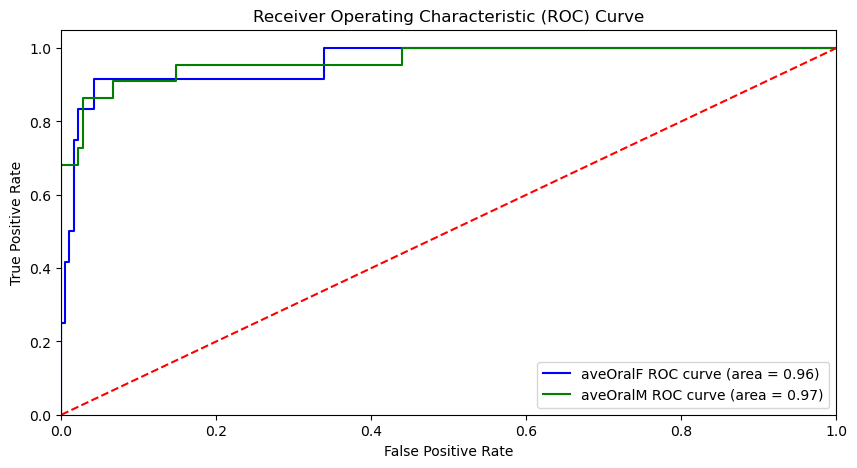

In [173]:
# Create grahpic to present ROC curve.

from sklearn.metrics import roc_curve, auc
fpr_F, tpr_F, _ = roc_curve(targets_test_cf, logreg_cf.predict_proba(features_test_cf)[:,1])
roc_auc_F = auc(fpr_F, tpr_F)
fpr_M, tpr_M, _ = roc_curve(targets_test_cm, logreg_cm.predict_proba(features_test_cm)[:,1])
roc_auc_M = auc(fpr_M, tpr_M)
plt.figure(figsize=(10,5))
plt.plot(fpr_F, tpr_F, color='blue', label=f'aveOralF ROC curve (area = {roc_auc_F:.2f})')
plt.plot(fpr_M, tpr_M, color='green', label=f'aveOralM ROC curve (area = {roc_auc_M:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **Random Forest Classification**

In [174]:
from sklearn.ensemble import RandomForestClassifier

#Create the full pipeline including the preprocessor and the model
rf_cf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_cf.fit(features_train_cf, targets_train_cf)
targets_pred_cf = rf_cf.predict(features_test_cf)

print("Random Forest Classification (aveOralF):")
print(classification_report(targets_test_cf, targets_pred_cf))
print(confusion_matrix(targets_test_cf, targets_pred_cf))

rf_cm = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_cm.fit(features_train_cm, targets_train_cm)
targets_pred_cm = rf_cm.predict(features_test_cm)

print("Random Forest Classification (aveOralM):")
print(classification_report(targets_test_cm, targets_pred_cm.round()))
print(confusion_matrix(targets_test_cm, targets_pred_cm.round()))

Random Forest Classification (aveOralF):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       192
           1       0.89      0.67      0.76        12

    accuracy                           0.98       204
   macro avg       0.93      0.83      0.87       204
weighted avg       0.97      0.98      0.97       204

[[191   1]
 [  4   8]]
Random Forest Classification (aveOralM):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       182
           1       0.77      0.77      0.77        22

    accuracy                           0.95       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.95      0.95      0.95       204

[[177   5]
 [  5  17]]


### **Neural Network Classification**

In [175]:
from sklearn.neural_network import MLPClassifier

# Create the full pipeline including the preprocessor and the model
mlp_cf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_cf.fit(features_train_cf, targets_train_cf)
targets_pred_cf = mlp_cf.predict(features_test_cf)

print("Neural Network Classification (aveOralF):")
print(classification_report(targets_test_cf, targets_pred_cf))
print(confusion_matrix(targets_test_cf, targets_pred_cf))

mlp_cm = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_cm.fit(features_train_cm, targets_train_cm)
targets_pred_cm = mlp_cm.predict(features_test_cm)

print("Neural Network Classification (aveOralM):")
print(classification_report(targets_test_cm, targets_pred_cm))
print(confusion_matrix(targets_test_cm, targets_pred_cm))


Neural Network Classification (aveOralF):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       192
           1       0.62      0.67      0.64        12

    accuracy                           0.96       204
   macro avg       0.80      0.82      0.81       204
weighted avg       0.96      0.96      0.96       204

[[187   5]
 [  4   8]]
Neural Network Classification (aveOralM):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       182
           1       0.74      0.77      0.76        22

    accuracy                           0.95       204
   macro avg       0.86      0.87      0.86       204
weighted avg       0.95      0.95      0.95       204

[[176   6]
 [  5  17]]



### Classification Model Comparison (Recall for Fever Class (Positive))

| Model                  | aveOralF Recall  | aveOralM Recall  |
|------------------------|------------------|------------------|
| Logistic Regression    | 0.50             | 0.82             |
| Random Forest          | 0.77             | 0.95             |
| Neural Network (MLP)   | 0.67             | 0.77             |


Logistic Regression struggled on aveOralF (0.50 recall), likely because the fast-mode fever labels are noisier and less linearly separable. However, it performed reasonably well on aveOralM (0.82), which appears more stable and easier to classify.

The Random Forest model performed best for detecting fevers in both fast mode and monitor mode, achieving the highest recall scores (0.77 and 0.95 respectively). This suggests that Random Forest handled the non-linear patterns and noise present in the features more effectively than the other models.

The Neural Network (MLP) performed moderately on aveOralF (0.67) but did not outperform Random Forest for either target. This is likely due to the relatively small dataset and class imbalance, which can make neural networks more difficult to train effectively.
